In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data_reg=pd.read_excel('data_reg.xlsx')
data_class=pd.read_excel('data_class.xlsx')
data_reg_prep=pd.read_excel('data_reg_prep.xlsx')
data_class_prep=pd.read_excel('data_class_prep.xlsx')

# DecisionTree

In [136]:
from sklearn import tree
from sklearn.model_selection import train_test_split
col_temp = ['OverallQual', 'OverallCond', 'IsRemodGar', 'IsRemod']
data_class[col_temp] = data_class[col_temp].astype("object")

data_cat_dummy =data_class.drop("PriceLevel", axis=1).select_dtypes(include = "object")
print(data_cat_dummy.shape)
for i in data_cat_dummy.columns.tolist():
    dummy_df = pd.get_dummies(data_class[i], prefix=i,dtype=int)
    data_cat_dummy = pd.concat([data_cat_dummy,dummy_df], axis=1)
    data_cat_dummy = data_cat_dummy.drop(i, axis = 1)

data_num = data_class.select_dtypes(include ="number")

# x = data.iloc[:,data_columns != "PriceLevel"]
X = pd.concat([data_num,data_cat_dummy],axis=1)
Y = data_class["PriceLevel"]
# print(Y)
# encoding
# print(X.select_dtypes(include = "object").columns)
# X_label =X[['MSZoning', 'LotShape', 'HouseStyle', 'Exterior1st', 'MasVnrType',
#        'Foundation','CentralAir','GarageType','PavedDrive','SaleType','SaleCondition']]
# X_ordinal = X[['BsmtQual', 'HeatingQC', 'KitchenQual','FireplaceQu',
#                'GarageQual']]
# #print(X[''])

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.3)
Xtrain

(2930, 20)


C:\Users\T480S\AppData\Local\Temp\ipykernel_20832\1988820489.py:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(data_class[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_20832\1988820489.py:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(data_class[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_20832\1988820489.py:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy_df = pd.get_dummies(data_class[i], prefix=i,dtype=int)
C:\Users\T480S\AppData\Local\Temp\ipykernel_20832\1988820489.py:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when 

,LotArea,YearBuilt,MasVnrArea,Fireplaces,GarAreaPerCar,GrLivAreaPerRoom,TotalHouseSF,TotalFullBath,TotalPorchSF,MSZoning_A (agr),...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,IsRemodGar_0,IsRemodGar_1,IsRemod_0,IsRemod_1
1450,7990,1975,0,0,280.000000,184.800000,1848,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2078,12615,1950,0,1,288.000000,308.285714,3360,3,68,0,...,0,0,0,0,1,0,1,0,0,1
613,9768,1955,0,0,330.000000,192.000000,1920,2,70,0,...,0,0,0,0,1,0,1,0,1,0
560,10000,1961,0,1,264.000000,190.666667,2008,2,0,0,...,0,0,0,0,1,0,1,0,0,1
273,8777,1945,0,0,240.000000,128.000000,640,1,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,9525,1954,0,0,366.000000,234.400000,2344,2,0,0,...,0,0,0,0,1,0,1,0,0,1
2759,11645,2005,198,0,251.333333,265.000000,3160,3,80,0,...,0,0,0,0,0,1,1,0,0,1
1287,4800,1910,0,0,330.000000,226.666667,2040,1,50,0,...,0,0,0,0,1,0,1,0,0,1
994,9535,1998,0,0,236.000000,229.142857,2530,2,82,0,...,0,0,0,0,1,0,1,0,1,0


In [75]:
Xtrain

,LotArea,YearBuilt,MasVnrArea,Fireplaces,GarAreaPerCar,GrLivAreaPerRoom,TotalHouseSF,TotalFullBath,TotalPorchSF,MSZoning_A (agr),...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,IsRemodGar_0,IsRemodGar_1,IsRemod_0,IsRemod_1
1383,9981,1967,340,0,270.000000,178.833333,2146,1,90,0,...,0,0,0,0,1,0,1,0,1,0
1126,10800,2007,100,1,278.666667,259.750000,3112,3,102,0,...,0,0,0,0,0,1,0,1,0,1
632,12285,1960,128,2,220.500000,265.800000,2658,1,203,0,...,0,0,0,0,1,0,1,0,1,0
203,12900,1912,0,0,0.000000,222.857143,2340,1,168,0,...,0,0,0,0,1,0,1,0,0,1
2549,8973,1958,85,0,375.000000,175.500000,2061,1,260,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,9910,2007,0,0,302.500000,273.800000,2738,2,203,0,...,0,0,0,0,0,1,1,0,1,0
15,53504,2003,603,1,280.333333,273.250000,4929,4,246,0,...,0,0,0,0,1,0,1,0,1,0
1771,12257,1995,513,1,250.666667,281.222222,3849,2,98,0,...,0,0,0,0,1,0,1,0,1,0
2418,9073,2006,0,0,220.000000,186.500000,2230,2,32,0,...,0,0,0,0,0,1,1,0,1,0


In [137]:
from sklearn.preprocessing import LabelEncoder
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=1)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print("init is", score)
feature_names = Xtrain.columns.tolist()
# import graphviz
# dot_data = tree.export_graphviz(clf,feature_names = Xtrain.columns.tolist(),
#                                 filled = True, rounded = True)
# graph = graphviz.Source(dot_data)
# graph
# [*zip(feature_names,clf.feature_importances_)]
sorted_features = sorted(zip(feature_names, clf.feature_importances_), key=lambda x: x[1], reverse=True)
sorted_features

clf1 = tree.DecisionTreeClassifier(criterion="entropy",random_state=1,splitter = "random")
#splitter 默认情况是best
clf1 = clf1.fit(Xtrain, Ytrain)
score = clf1.score(Xtest, Ytest)
print("splitter is", score)

clf1 = tree.DecisionTreeClassifier(criterion="entropy"
                                   ,random_state=1
                                   ,max_depth = 10)
#splitter 默认情况是best
clf1 = clf1.fit(Xtrain, Ytrain)
score = clf1.score(Xtest, Ytest)
print("max_depth = 3", score)

clf1 = tree.DecisionTreeClassifier(criterion="entropy"
                                   ,random_state=1
                                   ,max_depth = 10
                                   ,min_samples_leaf=8
                                   ,min_samples_split=20)#the minimum number of samples to split
#splitter 默认情况是best
clf1 = clf1.fit(Xtrain, Ytrain)
score = clf1.score(Xtest, Ytest)
#score = clf1.score(Xtrain, Ytrain)
print("min_samples_split=10", score)

#apply返回每个测试样本所在的叶子节点的索引
print(clf1.apply(Xtest))
#predict返回每个测试样本的分类/回归结果
print(clf1.predict(Xtest))



init is 0.6689419795221843
splitter is 0.6689419795221843
max_depth = 3 0.6860068259385665
min_samples_split=10 0.6905574516496018
[227  32 104  31 144  62 222 222  13  52  66 131 222  23  77  27  32  28
   6 115 115 182  27 182 217  91   6 208  48 105 225 109 215 152 182 202
 222 222  27 163 215  35  76   6  67 152  30 152 229 218  27  95 119 152
 104  66 196   6 225 131  50 104  62  67 130 157   6 109  48  74 182  84
  27   6 182 203 112  18 225  52 182 163 222  27  90 222 115  16  27 119
 222 160  74  60  18  98 183 142 222 224 115  91 150  13 224 222   6  90
  95 222  84  68 116 115 202 196 227 169  50 217 215  30  34 109 233 159
 177  30  34  91 135 116 217 108 175 152 115  30 206  52 182 120 230 203
 222  86   6 233  34 230  72 222 222 194  72 182 112  18 225 172 222 150
  30 215 201  98  14   6 227 217  84  13 182  86 133 225 225 164 229 146
 108 182 152 217 222 108  97  18 111 202 159 112  27 186 204  23 106  27
 112 222 229 194  27  18  18  91 141 230  94 116 119  48 108  23 2

In [106]:
test = []
for i in range(10):
    for j in range(15):
        for k in range(20):
            clf = tree.DecisionTreeClassifier(max_depth=i+2
                                            ,criterion="entropy"
                                            ,random_state=1
                                            #,splitter="random"
                                            ,min_samples_leaf=j+2
                                            ,min_samples_split=k+2
                                            )
            clf = clf.fit(Xtrain, Ytrain)
            score = clf.score(Xtest, Ytest)
            test.append(([i,j,k],score))

In [ ]:
test
score_lst = [item[1] for item in test]
score_lst
index_lst = [i for i in range(len(test))]
index_lst

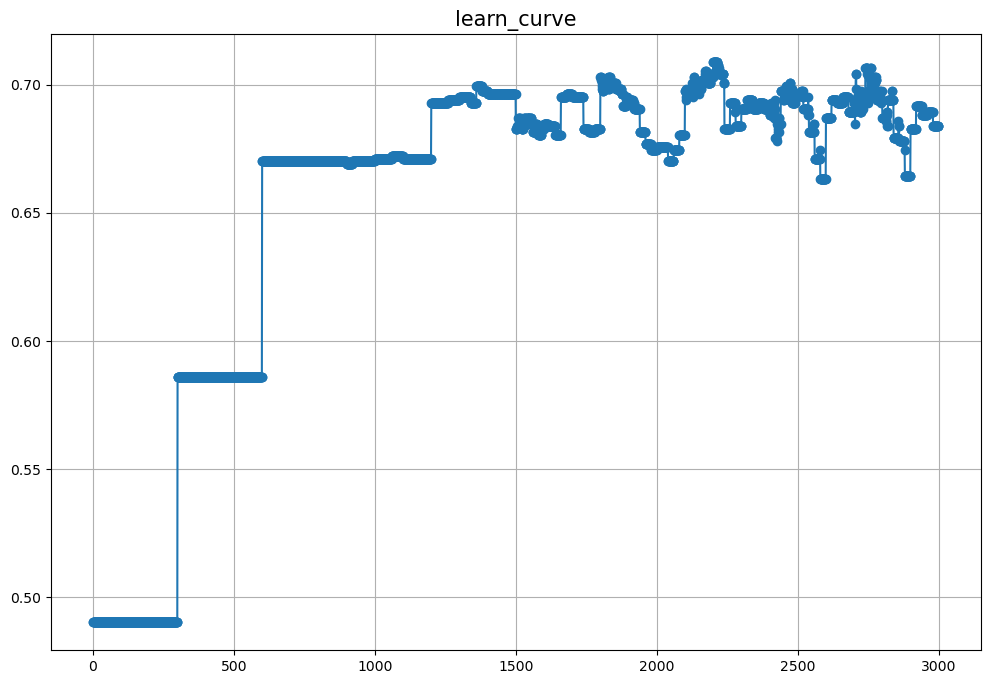

[([7, 5, 0], 0.7087599544937428),
 ([7, 5, 1], 0.7087599544937428),
 ([7, 5, 2], 0.7087599544937428),
 ([7, 5, 3], 0.7087599544937428),
 ([7, 5, 4], 0.7087599544937428),
 ([7, 5, 5], 0.7087599544937428),
 ([7, 5, 6], 0.7087599544937428),
 ([7, 5, 7], 0.7087599544937428),
 ([7, 5, 8], 0.7087599544937428),
 ([7, 5, 9], 0.7087599544937428),
 ([7, 5, 10], 0.7087599544937428),
 ([7, 5, 11], 0.7087599544937428),
 ([7, 5, 12], 0.7087599544937428),
 ([7, 5, 13], 0.7087599544937428),
 ([7, 5, 14], 0.7087599544937428),
 ([7, 5, 15], 0.7076222980659841),
 ([7, 5, 16], 0.7076222980659841),
 ([7, 5, 17], 0.7076222980659841),
 ([7, 5, 18], 0.7064846416382252),
 ([7, 5, 19], 0.7064846416382252),
 ([9, 2, 0], 0.7064846416382252),
 ([9, 2, 1], 0.7064846416382252),
 ([9, 2, 2], 0.7064846416382252),
 ([9, 2, 3], 0.7064846416382252),
 ([9, 2, 4], 0.7064846416382252),
 ([9, 2, 5], 0.7064846416382252),
 ([9, 2, 6], 0.7064846416382252),
 ([9, 2, 17], 0.7064846416382252),
 ([9, 2, 18], 0.7064846416382252),
 (

In [118]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(index_lst, score_lst, marker='o',label='Cross-correlation Value')

ax.set_title('learn_curve',fontdict={'fontsize':15})
#ax.set_xticklabels(s.index, rotation=90)
#ax.set_xlabel("An experienced threshold of 0.4 was set in this analysis, \n\)

#ax.set_yticks([i/10 for i in range(11)])
#ax.set_ylabel('Cross-correlation Value')

#ax.axhline(y=cross_thresholds, color='red', linestyle='--', label='Threshold')
#ax.legend()
ax.grid(True)
plt.show()

sorted_features = sorted(test, key=lambda x: x[1], reverse=True)
sorted_features
    

In [139]:
#用网格搜索调整参数
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                ,"max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                #,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                }
clf = DecisionTreeClassifier(random_state=1)
GS = GridSearchCV(clf, parameters, cv=5)
GS.fit(Xtrain,Ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                         'splitter': ('best', 'random')})

In [138]:
Xtrain

,LotArea,YearBuilt,MasVnrArea,Fireplaces,GarAreaPerCar,GrLivAreaPerRoom,TotalHouseSF,TotalFullBath,TotalPorchSF,MSZoning_A (agr),...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,IsRemodGar_0,IsRemodGar_1,IsRemod_0,IsRemod_1
1450,7990,1975,0,0,280.000000,184.800000,1848,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2078,12615,1950,0,1,288.000000,308.285714,3360,3,68,0,...,0,0,0,0,1,0,1,0,0,1
613,9768,1955,0,0,330.000000,192.000000,1920,2,70,0,...,0,0,0,0,1,0,1,0,1,0
560,10000,1961,0,1,264.000000,190.666667,2008,2,0,0,...,0,0,0,0,1,0,1,0,0,1
273,8777,1945,0,0,240.000000,128.000000,640,1,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,9525,1954,0,0,366.000000,234.400000,2344,2,0,0,...,0,0,0,0,1,0,1,0,0,1
2759,11645,2005,198,0,251.333333,265.000000,3160,3,80,0,...,0,0,0,0,0,1,1,0,0,1
1287,4800,1910,0,0,330.000000,226.666667,2040,1,50,0,...,0,0,0,0,1,0,1,0,0,1
994,9535,1998,0,0,236.000000,229.142857,2530,2,82,0,...,0,0,0,0,1,0,1,0,1,0


In [140]:
print(GS.best_params_)
print(GS.best_score_)


{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'splitter': 'best'}
0.6938021482404606


# Regression decision tree

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

classification = tree.DecisionTreeClassifier(max_depth=7+2
                                            ,criterion="entropy"
                                            ,random_state=1
                                            #,splitter="random"
                                            ,min_samples_leaf=5+2
                                            ,min_samples_split=10+2
                                            )
cross_val_score(classification,Xtrain,Ytrain,cv =5)



array([0.6836983 , 0.69756098, 0.7097561 , 0.64634146, 0.67073171])

# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [141]:
X = pd.concat([data_num,data_cat_dummy],axis=1)
Y = data_reg["SalePrice"]
#print(X)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.3)

regression = tree.DecisionTreeRegressor(#max_depth=7+2
                                            #,criterion="entropy"
                                            random_state=1
                                            #,splitter="random"
                                            #,min_samples_leaf=5+2
                                            #,min_samples_split=10+2
                                            )
print(cross_val_score(regression,X,Y,cv =5))#默认的是R-square
print(cross_val_score(regression,X,Y,cv =5,scoring = "neg_mean_squared_error"))
print(cross_val_score(regression,X,Y,cv =5,scoring = "neg_mean_absolute_error"))

[0.82989328 0.76198788 0.63798189 0.7161834  0.78819418]
[-1.28446973e+09 -1.35888713e+09 -2.10531054e+09 -1.93583396e+09
 -1.22007607e+09]
[-24714.18259386 -26157.91979522 -25030.96700796 -25944.01706485
 -22867.66382253]


# Grid Search

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {#'splitter':('best','random')
               # ,'criterion':("gini","entropy")
                "max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                #,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                }
clf = DecisionTreeRegressor(random_state=1)
GS = GridSearchCV(clf, parameters, cv=5,scoring = "neg_mean_absolute_error")
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             scoring='neg_mean_absolute_error')

In [145]:
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 8, 'min_samples_leaf': 11}
-22625.647492865053


# randomforestclassifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
Y = data_class["PriceLevel"]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.3)


In [155]:
clf = DecisionTreeClassifier(random_state = 0).fit(Xtrain, Ytrain)
rfc = RandomForestClassifier(random_state = 0).fit(Xtrain, Ytrain)

print(clf.score(Xtest, Ytest))
print(rfc.score(Xtest, Ytest))

0.6746302616609784
0.7929465301478953


In [164]:
[*range(1,6)]

[1, 2, 3, 4, 5]

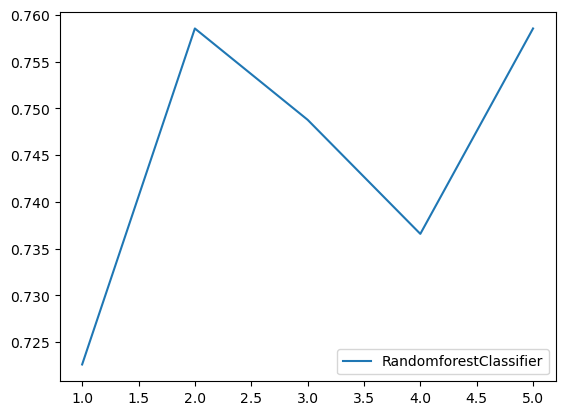

In [165]:
rfc = cross_val_score(RandomForestClassifier(random_state = 0,n_estimators = 100),Xtrain,Ytrain,cv =5)
plt.plot(range(1,6),rfc,label = "RandomforestClassifier")
plt.legend()
plt.show()

In [188]:
superpa = []
for i in range(50,201,10):
    rfc = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    rfc_s = cross_val_score(rfc,Xtrain,Ytrain,cv =5).mean()
    superpa.append(rfc_s)


0.7562233695329654 15 800


NameError: name 'superpaa' is not defined

<Figure size 2000x500 with 0 Axes>

0.7562233695329654 15 150


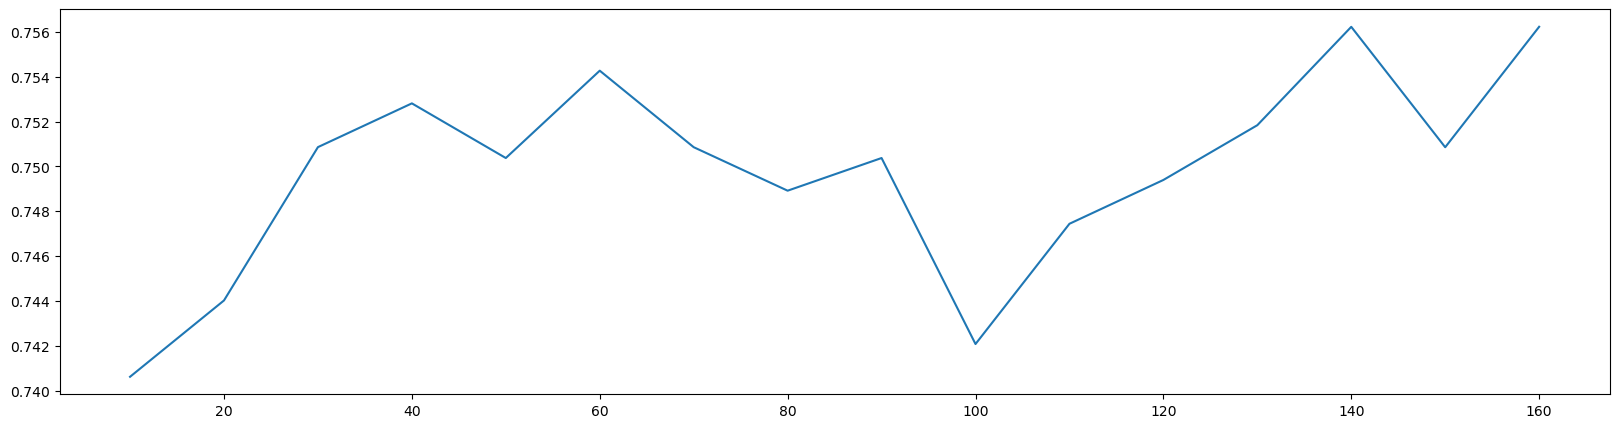

In [195]:
print(max(superpa),superpa.index(max(superpa)),(superpa.index(max(superpa)))*10)
plt.figure(figsize=[20,5])
plt.plot(range(10,(len(superpa)*10)+1,10),superpa)
plt.show()

In [193]:
superpa

[0.7406195478013174,
 0.7440223132158328,
 0.750857515874429,
 0.7528087353866239,
 0.7503720847427452,
 0.7542662156548573,
 0.7508551421280636,
 0.7489157913476945,
 0.7503720847427452,
 0.742079401815916,
 0.7474405079817222,
 0.7493941012402825,
 0.7518354993768916,
 0.7562209957866003,
 0.7508527683816985,
 0.7562233695329654]

In [198]:
rfc_cv_mean = []
for  i in range(10):
    rfc = RandomForestClassifier(n_estimators = 161)
    rfc_cv = cross_val_score(rfc,Xtrain,Ytrain,cv = 7).mean()
    rfc_cv_mean.append(rfc_cv)
    
 

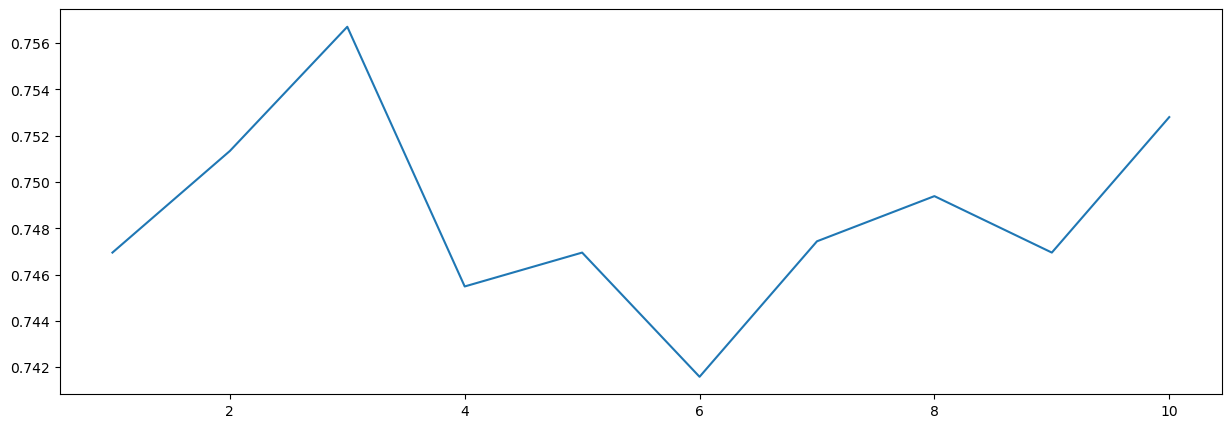

In [197]:

plt.figure(figsize=[15,5])
plt.plot(range(1,(len(rfc_cv_mean))+1),rfc_cv_mean)
plt.show()

In [202]:

rfc = RandomForestClassifier(n_estimators = 25,random_state = 0)
rfc = rfc.fit(Xtrain,Ytrain)
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

# bootstrap 

In [208]:
rfc = RandomForestClassifier(n_estimators=25,oob_score = True)
rfc = rfc.fit(Xtrain,Ytrain)
rfc.oob_score_


0.704534373476353

In [ ]:
# randomforestregresss

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Y = data_reg["SalePrice"]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size =0.3)
rfr = RandomForestRegressor(n_estimators = 101,random_state = 0)
cross_val_score(rfr,Xtrain,Ytrain,cv = 5,scoring = "neg_mean_squared_error")



In [214]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and create a new RandomForestClassifier with those
best_rf_classifier = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

# Train the model on the entire training set with the best hyperparameters
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the training and test sets
train_accuracy = best_rf_classifier.score(X_train, y_train)
test_accuracy = best_rf_classifier.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 1.0


In [2]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}